In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, datetime

In [3]:
df = pd.read_csv('cleaned_df.csv')

df.drop('Unnamed: 0', axis=1, inplace=True)
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Employee_Name,FromDiversityJobFairID,Salary,Termd,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",0,62506,0,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,No,White,2011-07-05,NaN,NaN,Active,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
1,"Ait Sidi, Karthikeyan",0,104437,1,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
2,"Akinkuolie, Sarah",0,64955,1,Production Technician II,MA,1810,1988-09-19,F,Married,US Citizen,No,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
3,"Alagbe,Trina",0,64991,0,Production Technician I,MA,1886,1988-09-27,F,Married,US Citizen,No,White,2008-01-07,NaN,NaN,Active,Production,Elijiah Gray,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
4,"Anderson, Carol",0,50825,1,Production Technician I,MA,2169,1989-09-08,F,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2


First I am going to do some minor changes to the dataset for better EDA. I will:
- Convert the datetime columns to datetime data type.
- Create an Age column.
- Create a Days_As_Employee column.
- Convert boolean numeric values to a Yes or No.

In [5]:
#Converting date columns to datetime datatype.

datetime_cols = ['DOB','DateofHire','DateofTermination','LastPerformanceReview_Date']

for i in datetime_cols:
    df[i] = pd.to_datetime(df[i])

In [6]:
#Creating Age and Days_As_Employee columns.

df['Age'] = date.today().year - df['DOB'].dt.year
df['Days_As_Employee'] = (df['DateofTermination'] - df['DateofHire']).dt.days
df.loc[df['Days_As_Employee'].isna(), 'Days_As_Employee'] = (datetime.today() - df['DateofHire']).dt.days

df['Age'] = df['Age'].astype(int)
df['Days_As_Employee'] = df['Days_As_Employee'].astype(int)

In [7]:
#Converting boolean values to 'Yes' and 'No' for ease of understanding.

cols_to_change = ['FromDiversityJobFairID','Termd']

for i in cols_to_change:
    df.loc[df[i] == 0, i] = 'No'
    df.loc[df[i] == 1, i] = 'Yes'

C:\Users\Thomas Campana\AppData\Local\Temp\ipykernel_17096\1572151572.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i] == 0, i] = 'No'
C:\Users\Thomas Campana\AppData\Local\Temp\ipykernel_17096\1572151572.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i] == 0, i] = 'No'


__Getting a baisc understanding of the data__

Now, I will get a general idea of the dataset. This is not looking at anything specific, just getting an overview of the data and distributions of the variables.

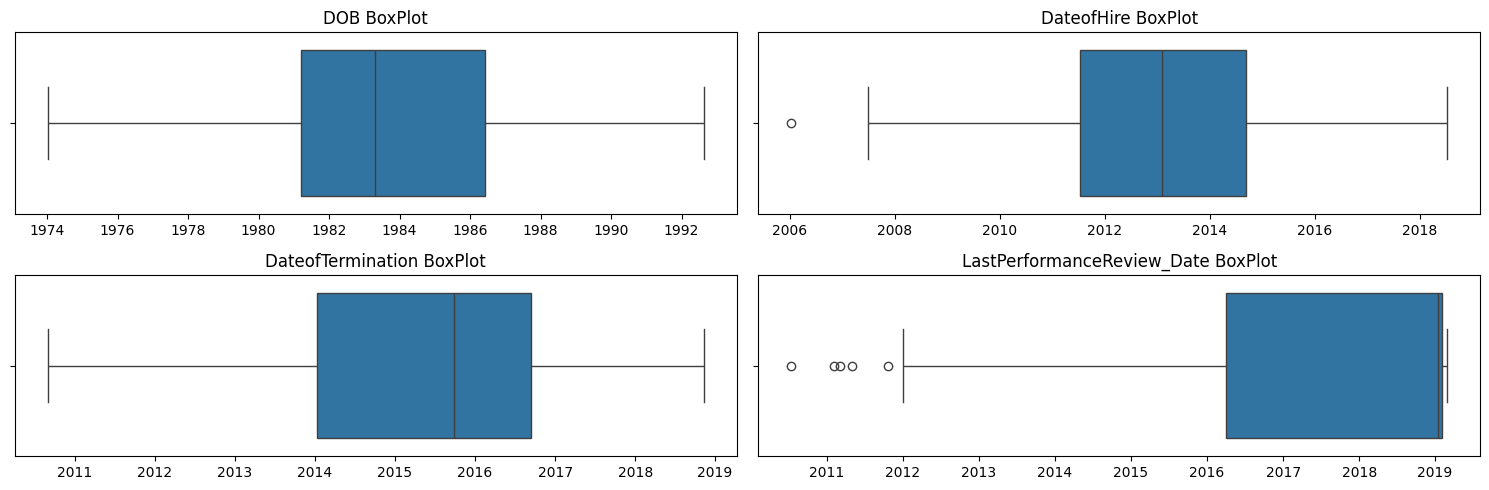

In [8]:
datetime_cols = ['DOB','DateofHire','DateofTermination','LastPerformanceReview_Date']

fig, axs = plt.subplots(2,2, figsize=(15,5), layout='tight')

for ax, title in zip(axs.flat, datetime_cols):

    sns.boxplot(df[title], orient='h', ax=ax)
    ax.set_title(f'{title} BoxPlot')
    ax.set_xlabel('')

plt.show()

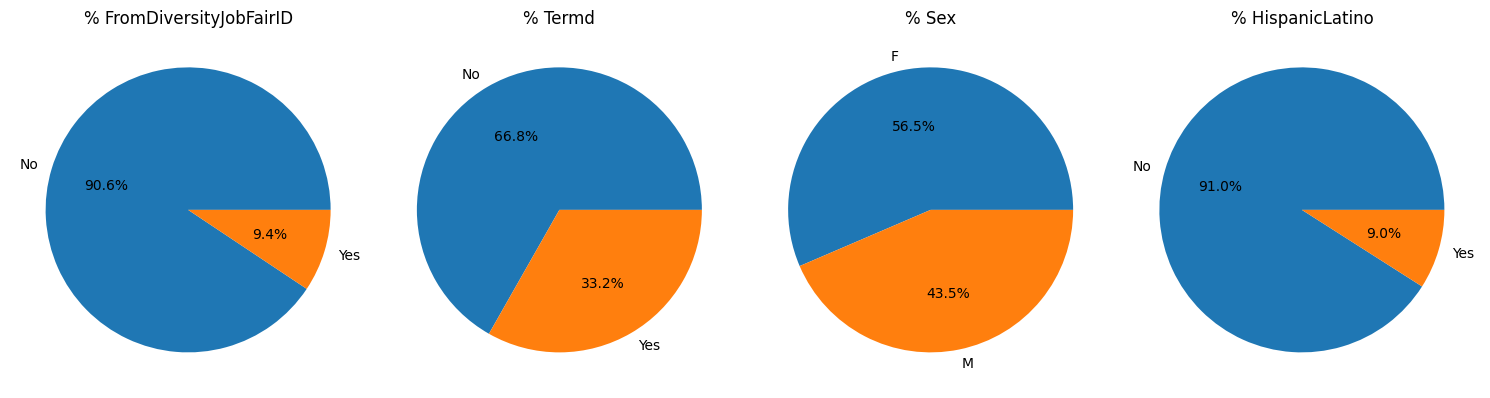

In [9]:
bool_cols = ['FromDiversityJobFairID','Termd','Sex','HispanicLatino']

fig, axs = plt.subplots(1,4, figsize=(15,10), layout='tight')

for ax, title in zip(axs.flat, bool_cols):
    label = df[title].value_counts().index
    ax.pie(df[title].value_counts(), labels=label, autopct='%1.1f%%')
    ax.set_title(f'% {title}')

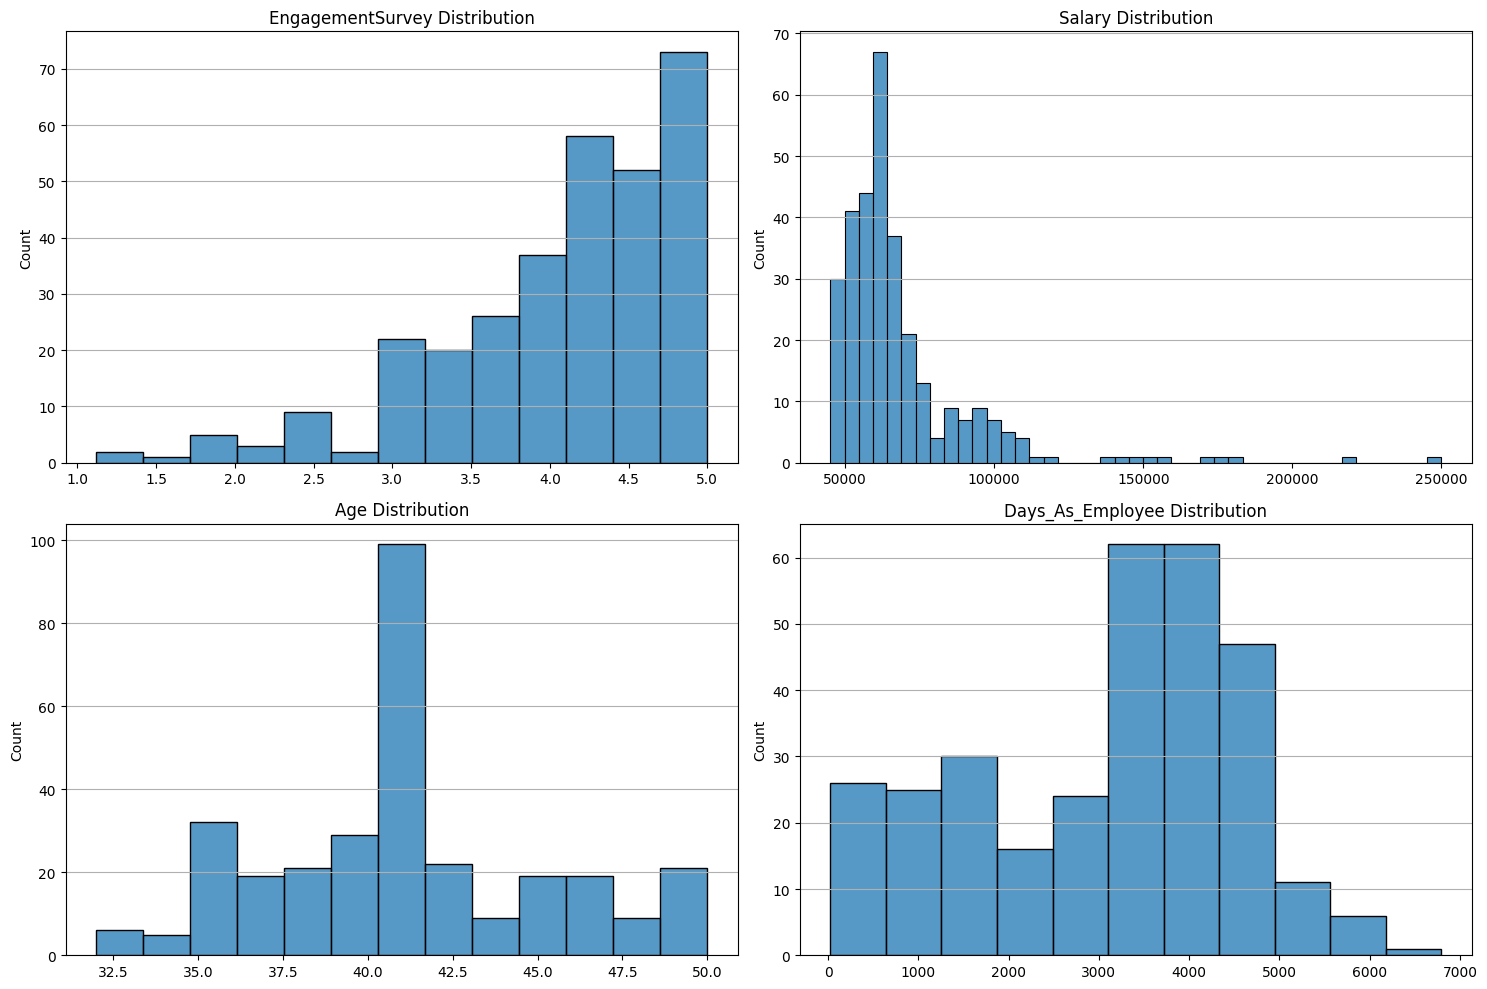

In [10]:
hist_cols = ['EngagementSurvey','Salary','Age','Days_As_Employee']

fig, axs = plt.subplots(2,2, figsize=(15,10), layout='tight')

for ax, title in zip(axs.flat, hist_cols):
    sns.histplot(df, x=title, ax=ax)
    ax.set_title(f'{title} Distribution')
    ax.set_xlabel('')
    ax.grid(axis='y')

plt.show()

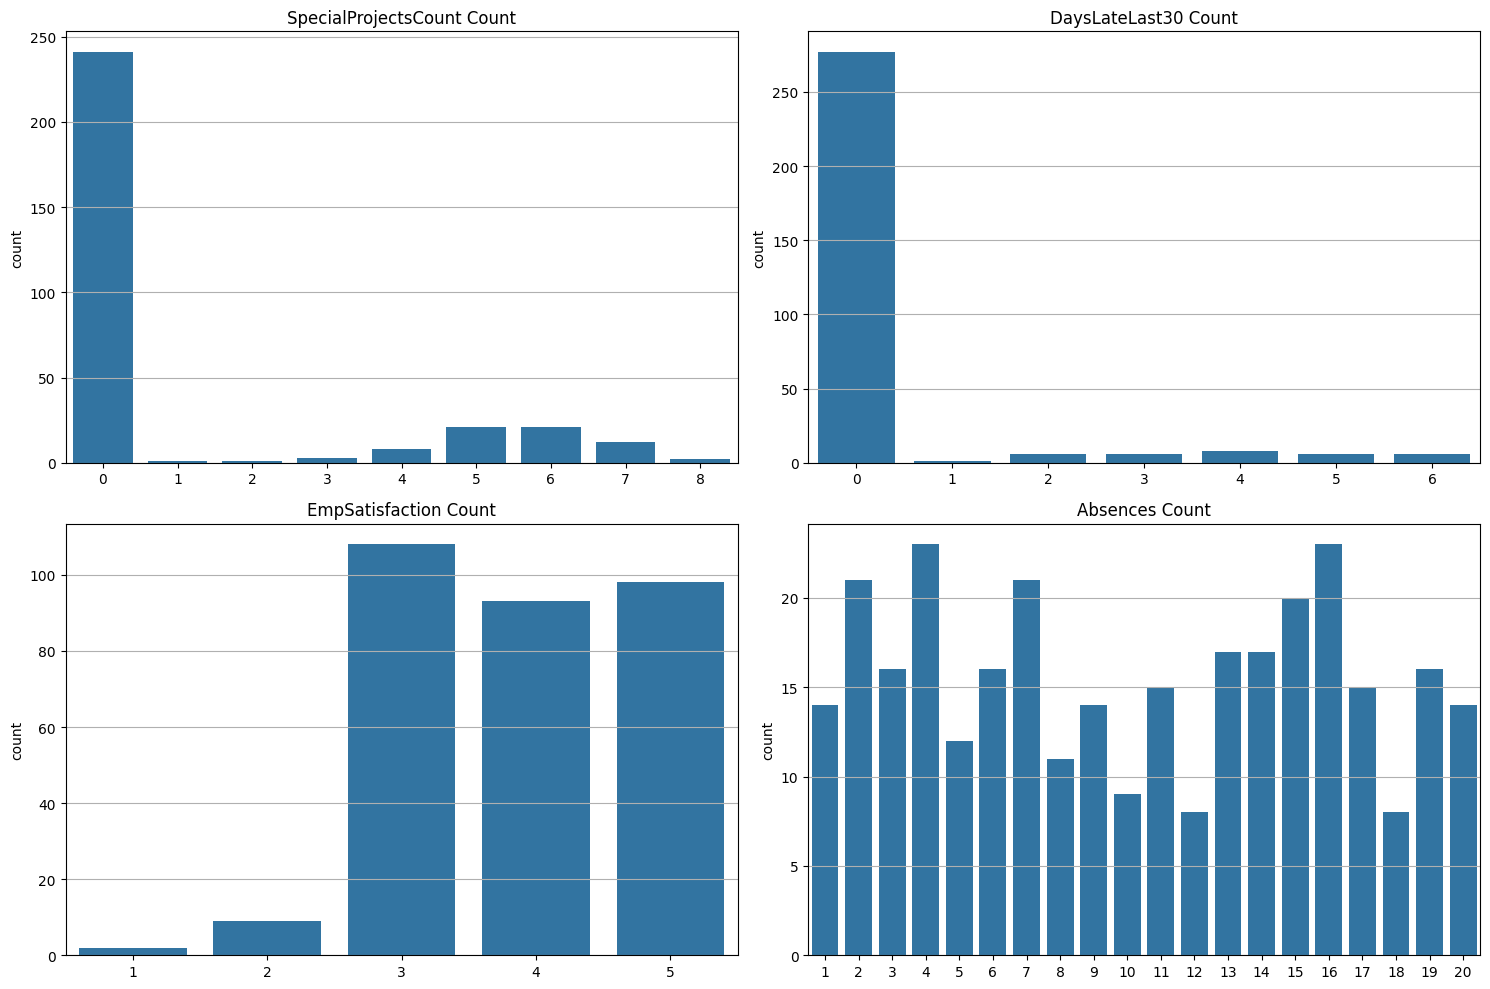

In [11]:
count_cols = ['SpecialProjectsCount','DaysLateLast30','EmpSatisfaction','Absences']

fig, axs = plt.subplots(2,2, figsize=(15,10), layout='tight')

for ax, title in zip(axs.flat, count_cols):
    sns.countplot(df, x=title, ax=ax)
    ax.set_title(f'{title} Count')
    ax.set_xlabel('')
    ax.grid(axis='y')

plt.show()

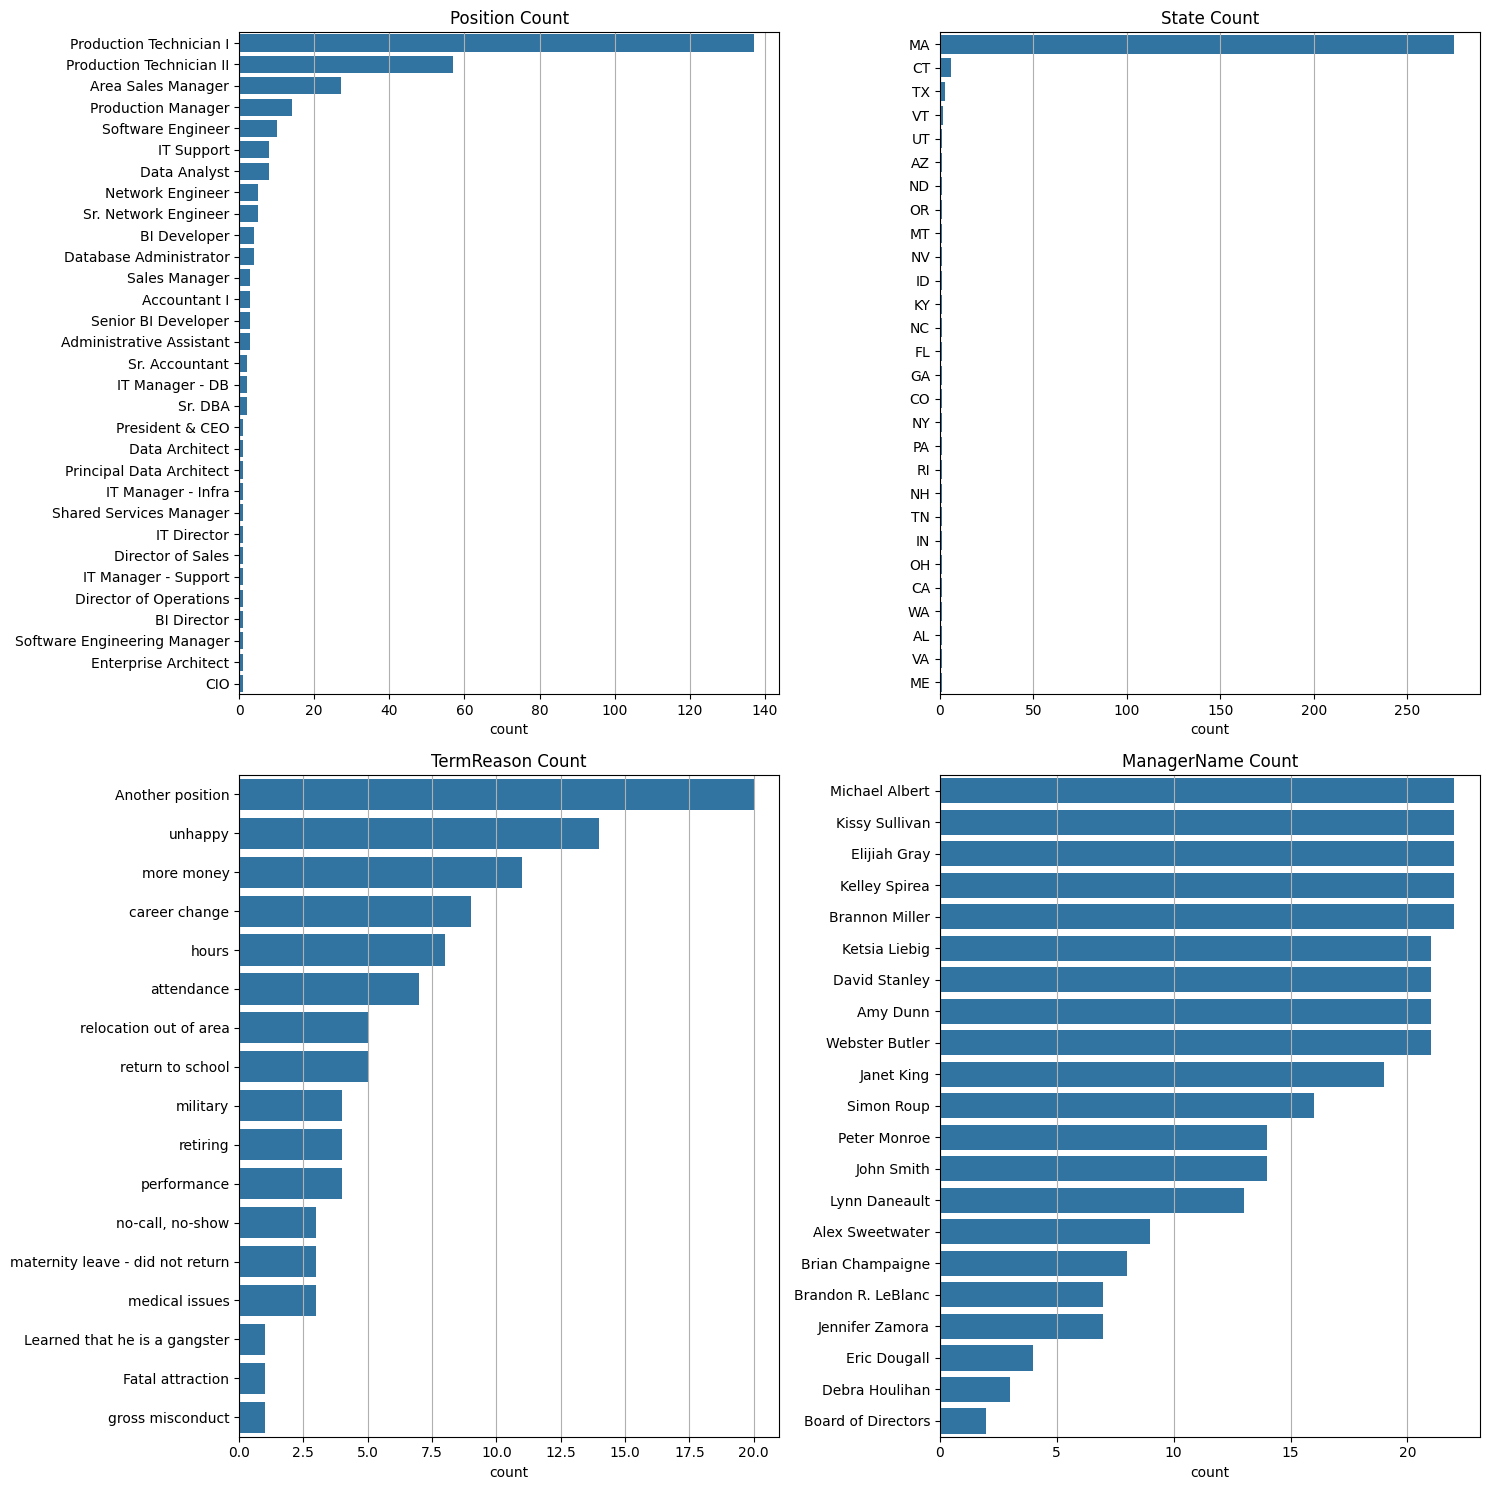

In [12]:
large_cat_cols = ['Position','State','TermReason','ManagerName']

fig, axs = plt.subplots(2,2, figsize=(15,15), layout='tight')

for ax, title in zip(axs.flat, large_cat_cols):
    sns.countplot(df, y=title, orient='h', order=df[title].value_counts().index, ax=ax)
    ax.set_title(f'{title} Count')
    ax.set_ylabel('')
    ax.grid(axis='x')

plt.show()

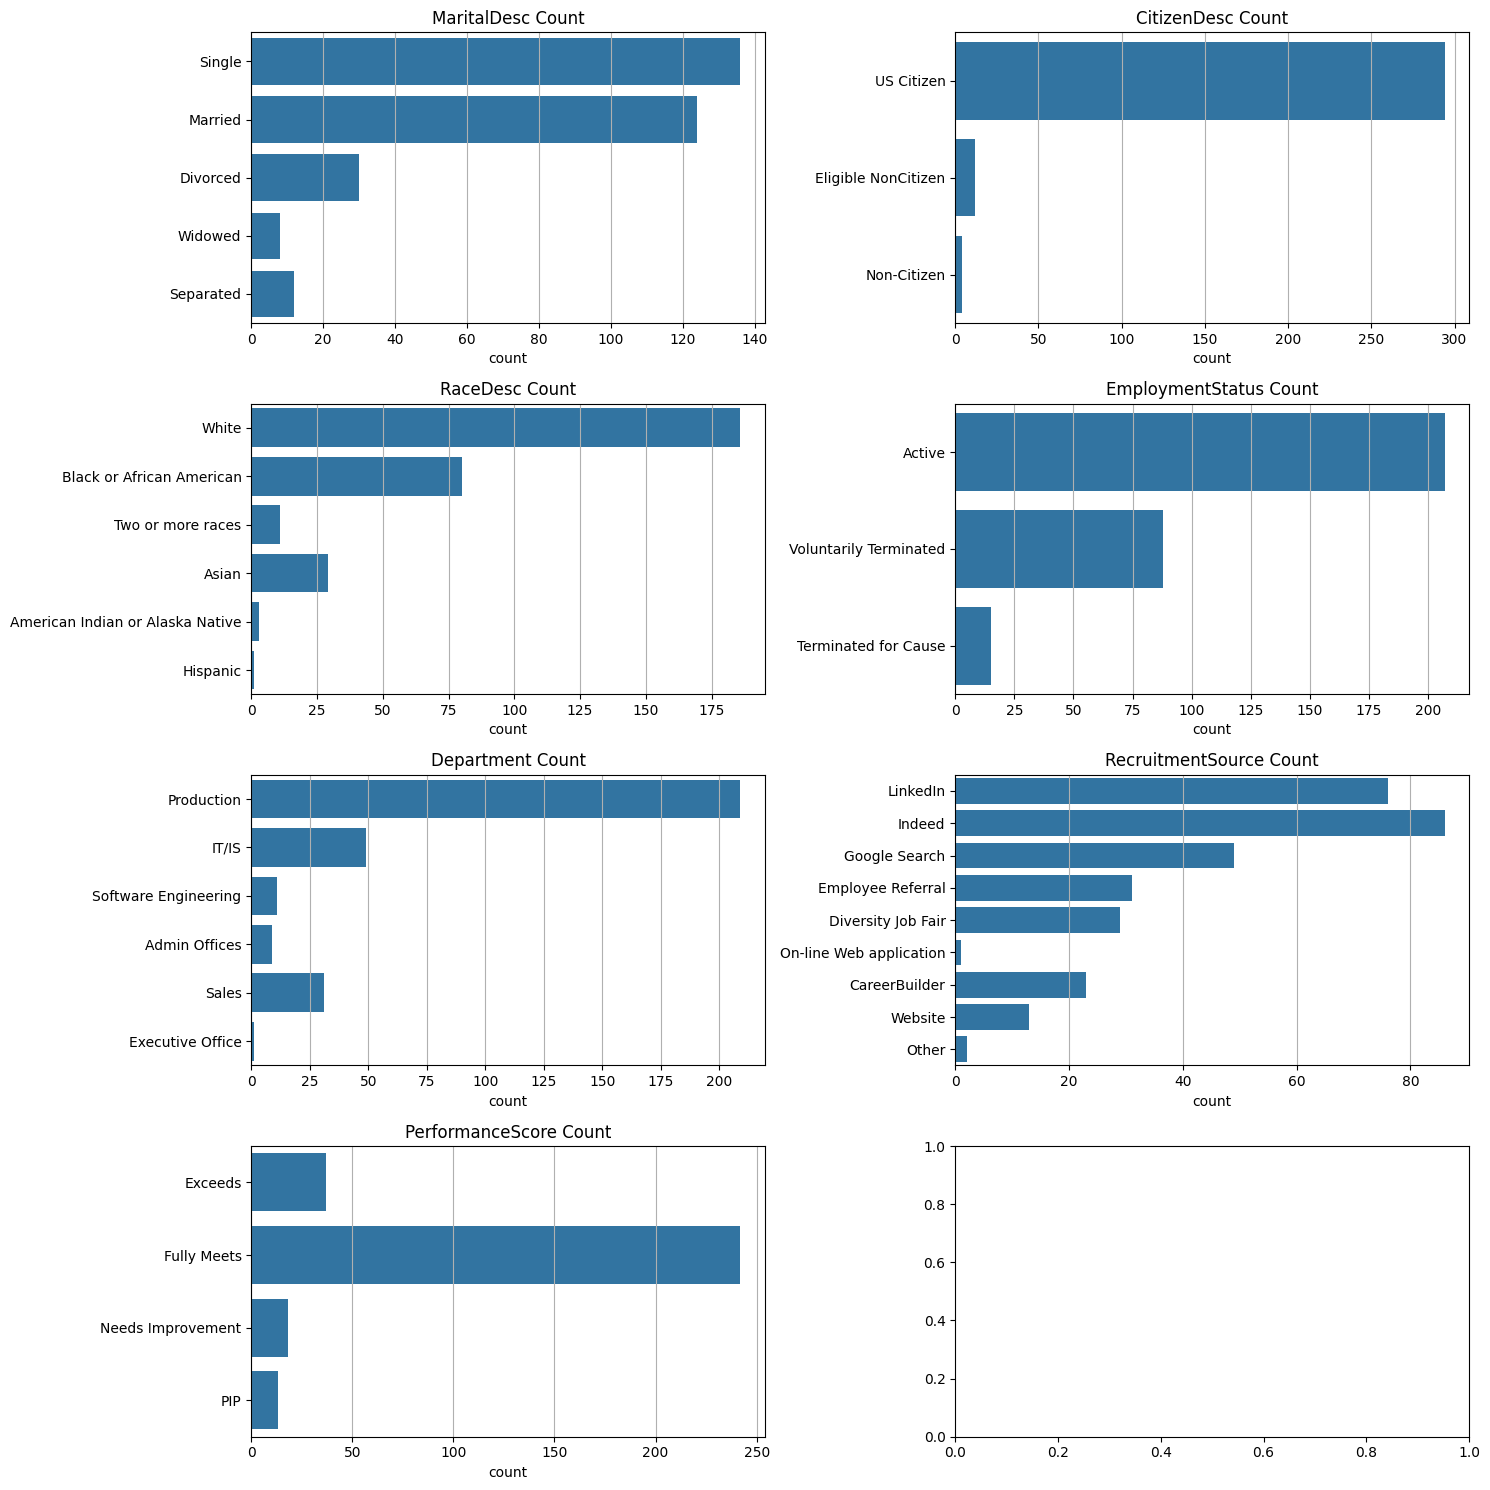

In [13]:
cat_cols = ['MaritalDesc','CitizenDesc','RaceDesc','EmploymentStatus','Department','RecruitmentSource','PerformanceScore']

fig, axs = plt.subplots(4,2, figsize=(15,15), layout='tight')

for ax, title in zip(axs.flat, cat_cols):
    sns.countplot(df, y=title, orient='h', ax=ax)
    ax.set_title(f'{title} Count')
    ax.set_ylabel('')
    ax.grid(axis='x')

plt.show()

In [14]:
df['HispanicLatino'].value_counts()

HispanicLatino
No     282
Yes     28
Name: count, dtype: int64

In [15]:
df['RaceDesc'].value_counts()

RaceDesc
White                               186
Black or African American            80
Asian                                29
Two or more races                    11
American Indian or Alaska Native      3
Hispanic                              1
Name: count, dtype: int64

In [16]:
def simpson_diversity(data):
    numerator = 0
    for i in data.value_counts():
        n = i * (i-1)
        numerator = numerator + n
    
    N = data.value_counts().sum()
    denominator = N * (N-1)

    simpson_value = (1 - (numerator/denominator))
    return round(simpson_value, 3)


In [17]:
simpson_diversity(df['RaceDesc'])

0.565

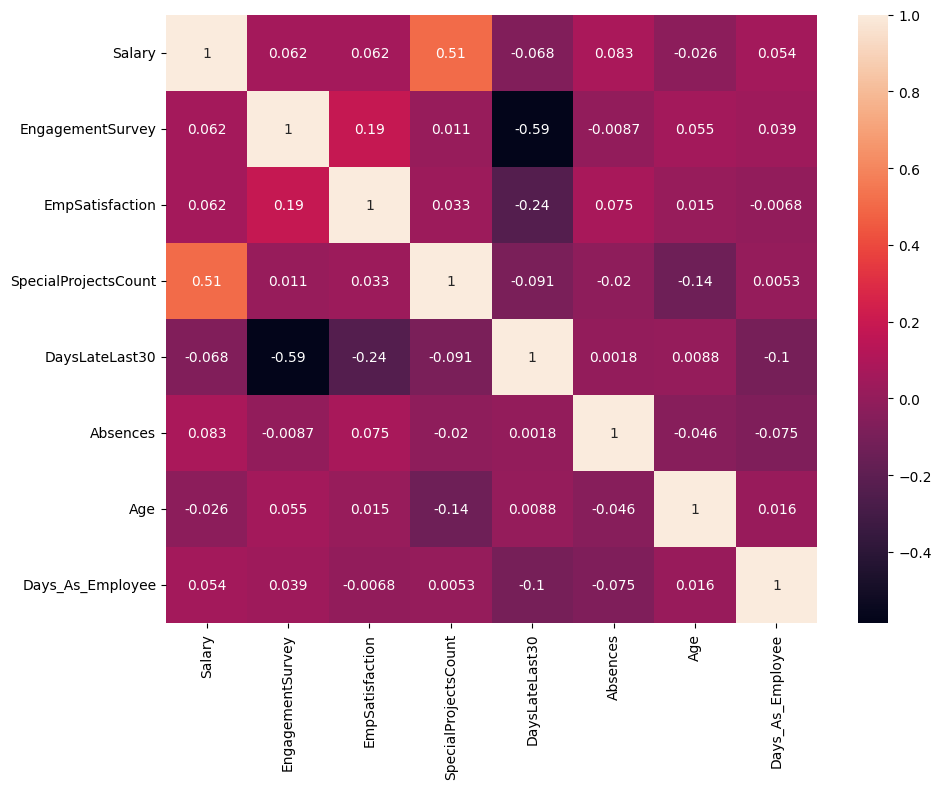

In [18]:
heat_df = df[['Salary','EngagementSurvey','EmpSatisfaction','SpecialProjectsCount','DaysLateLast30','Absences','Age','Days_As_Employee']]

fig, ax = plt.subplots(1, figsize=(10,8), layout='tight')
sns.heatmap(heat_df.corr(), annot=True, ax=ax)
plt.show()

__General Findings:__

- Overall:
    - Most people tend to be white, single or married, and a US citizen.
    - Production is by far the most common department.
    - Indeed and LinkedIn are the msot common recruitment channels.
    - Most people are not assigned 'Special Projects', but if they are assigned any special projects it tends to be for 5-6 times.
    - There are 28 people that identified as Hispanic/Latino, but only 1 person that put their Race as Hispanic.
    - There seems to be a correlation between Salary and Special Projects Count.
    - There seems to be a correlation between Engagement and Days Late Last 30. Makes sense considering people who are late more often probably feel less engagement with their work.
- Pros:
    - Most people Fully Meet their performance requirements.
    - Very few people are below a 3 in employee satisfaction.
    - Most people have not been late in the last 30 days.
    - Simpson's Diversity Index shows that the company has a 56.5% diversity ratio, which is quite good.
- Cons:
    - 33.2% of employees are terminated. This number seems to be quite high.
    - There is a relatively high number of people who quit/resign from their position.
    - The Absences distribution shows a Bimodal distribution. Should look closer at the population of people who are absent a lot.
    - The 3 most common reason for people leaving is finding another position, being unhappy, or wanting more money.

__Taking a closer look at things:__

Now I want to dive deeper into the data where I think there could be valuable information:
- From General Findings:
    - Try to find a trend for people who are absent very frequently.
    - Look at the common reasons/demographics for people that voluntarily terminate.
    - Find a trend in the people who are assigned 4+ special projects.


__Looking at High Absence vs Low Absence:__

In [19]:
high_absent_df = df.loc[df['Absences'] > 10]
low_absent_df = df.loc[df['Absences'] <= 10]

In [20]:
desc_cols_drop = ['DOB','DateofHire','DateofTermination','LastPerformanceReview_Date', 'Zip']
high_absent_df.drop(columns=desc_cols_drop).describe()

,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,Days_As_Employee
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,69699.921569,4.129608,3.960784,1.150327,0.398693,15.496732,41.091503,3091.575163
std,26743.275266,0.788353,0.895033,2.333315,1.299493,2.714785,4.123679,1545.236044
min,45115.000000,1.560000,1.000000,0.000000,0.000000,11.000000,32.000000,218.000000
25%,55722.000000,3.660000,3.000000,0.000000,0.000000,13.000000,38.000000,1653.000000
50%,62659.000000,4.290000,4.000000,0.000000,0.000000,15.000000,41.000000,3513.000000
75%,72106.000000,4.830000,5.000000,0.000000,0.000000,17.000000,43.000000,4241.000000
max,220450.000000,5.000000,5.000000,8.000000,6.000000,20.000000,50.000000,6131.000000


In [21]:
low_absent_df.drop(columns=desc_cols_drop).describe()

,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,Days_As_Employee
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,68067.165605,4.087771,3.821656,1.267516,0.433121,5.114650,41.210191,3111.840764
std,23365.213372,0.795000,0.923366,2.368008,1.297304,2.710304,4.110699,1409.281657
min,45046.000000,1.120000,1.000000,0.000000,0.000000,1.000000,32.000000,26.000000
25%,55140.000000,3.790000,3.000000,0.000000,0.000000,3.000000,39.000000,1889.000000
50%,62957.000000,4.280000,4.000000,0.000000,0.000000,5.000000,41.000000,3569.000000
75%,70545.000000,4.620000,5.000000,0.000000,0.000000,7.000000,44.000000,4017.000000
max,250000.000000,5.000000,5.000000,8.000000,6.000000,10.000000,50.000000,6796.000000


Low Absent Samples tend to, on average:
- Have lower salaries.
- Score lower on EngagementSurvey.
- Are less satisfied.
- Conduct more Special Projects.
- Have been late more often.

However, these difference are very minor and may not be indicative of an actual relationship between the variable and number of absences.

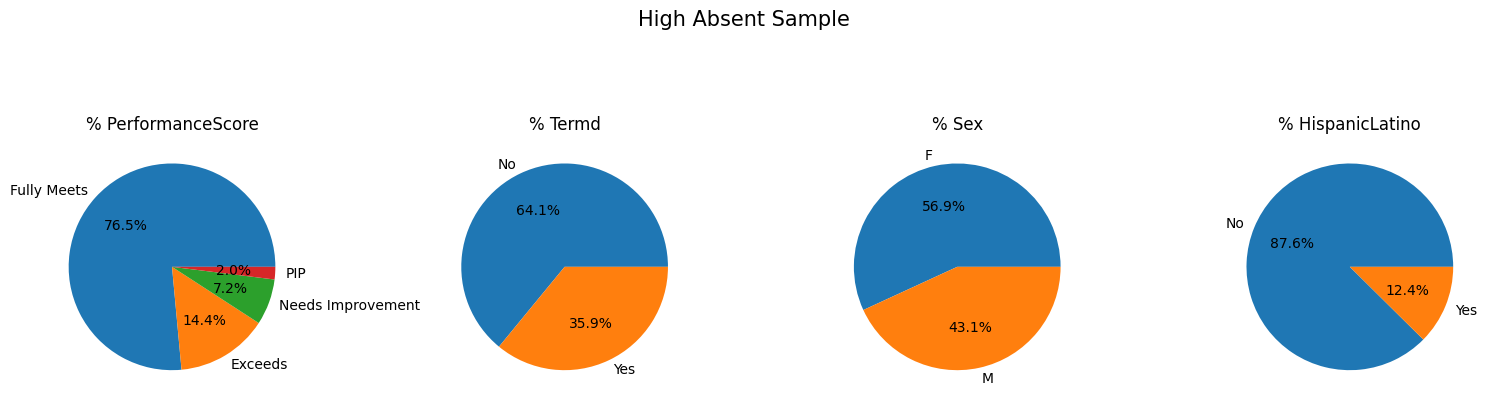

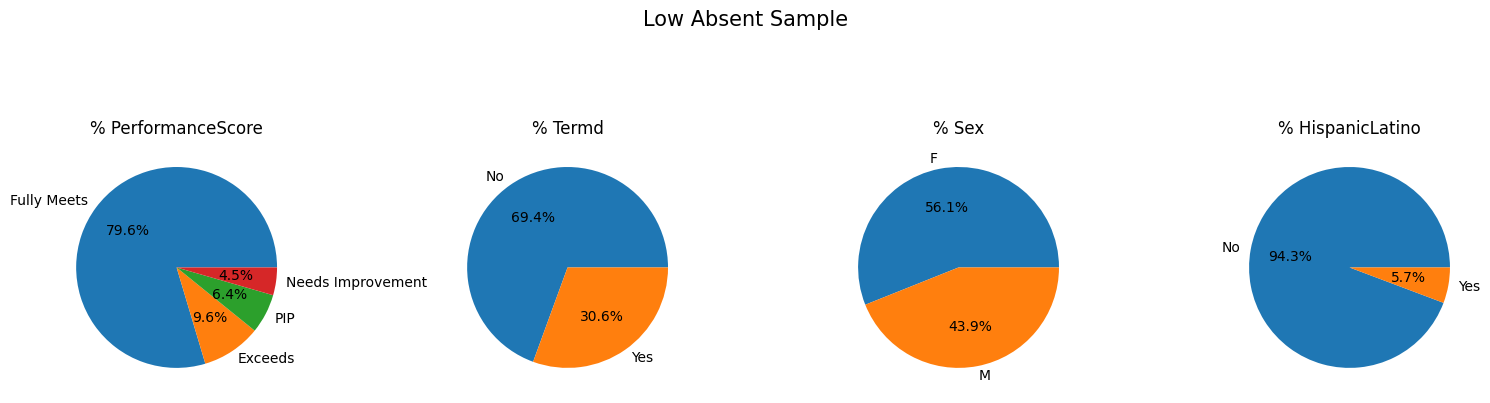

In [22]:
pie_cols = ['PerformanceScore','Termd','Sex','HispanicLatino']

fig, axs = plt.subplots(1,4, figsize=(15,5), layout='tight')
for ax, title in zip(axs.flat, pie_cols):
    label = high_absent_df[title].value_counts().index
    ax.pie(high_absent_df[title].value_counts(), labels=label, autopct='%1.1f%%')
    ax.set_title(f'% {title}')

plt.suptitle('High Absent Sample', fontsize=15)



fig, axs = plt.subplots(1,4, figsize=(15,5), layout='tight')
for ax, title in zip(axs.flat, pie_cols):
    label = low_absent_df[title].value_counts().index
    ax.pie(low_absent_df[title].value_counts(), labels=label, autopct='%1.1f%%')
    ax.set_title(f'% {title}')

plt.suptitle('Low Absent Sample', fontsize=15)
plt.show()

- The performance score of those with high absence appears to be better than those with low absence. Not what I expected but does point towards interesting behavior.
- High Absence population has higher rates of HispanicLatino and a higher termination rate.
- There is no difference in Sex between the two sample populations.

In [23]:
absent_df = df.copy()

In [24]:
absent_df['high_absent'] = 0
cond = absent_df['Absences'] <= 10

absent_df['high_absent'].where(cond=cond, other=1, inplace=True)

C:\Users\Thomas Campana\AppData\Local\Temp\ipykernel_17096\1350197941.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  absent_df['high_absent'].where(cond=cond, other=1, inplace=True)


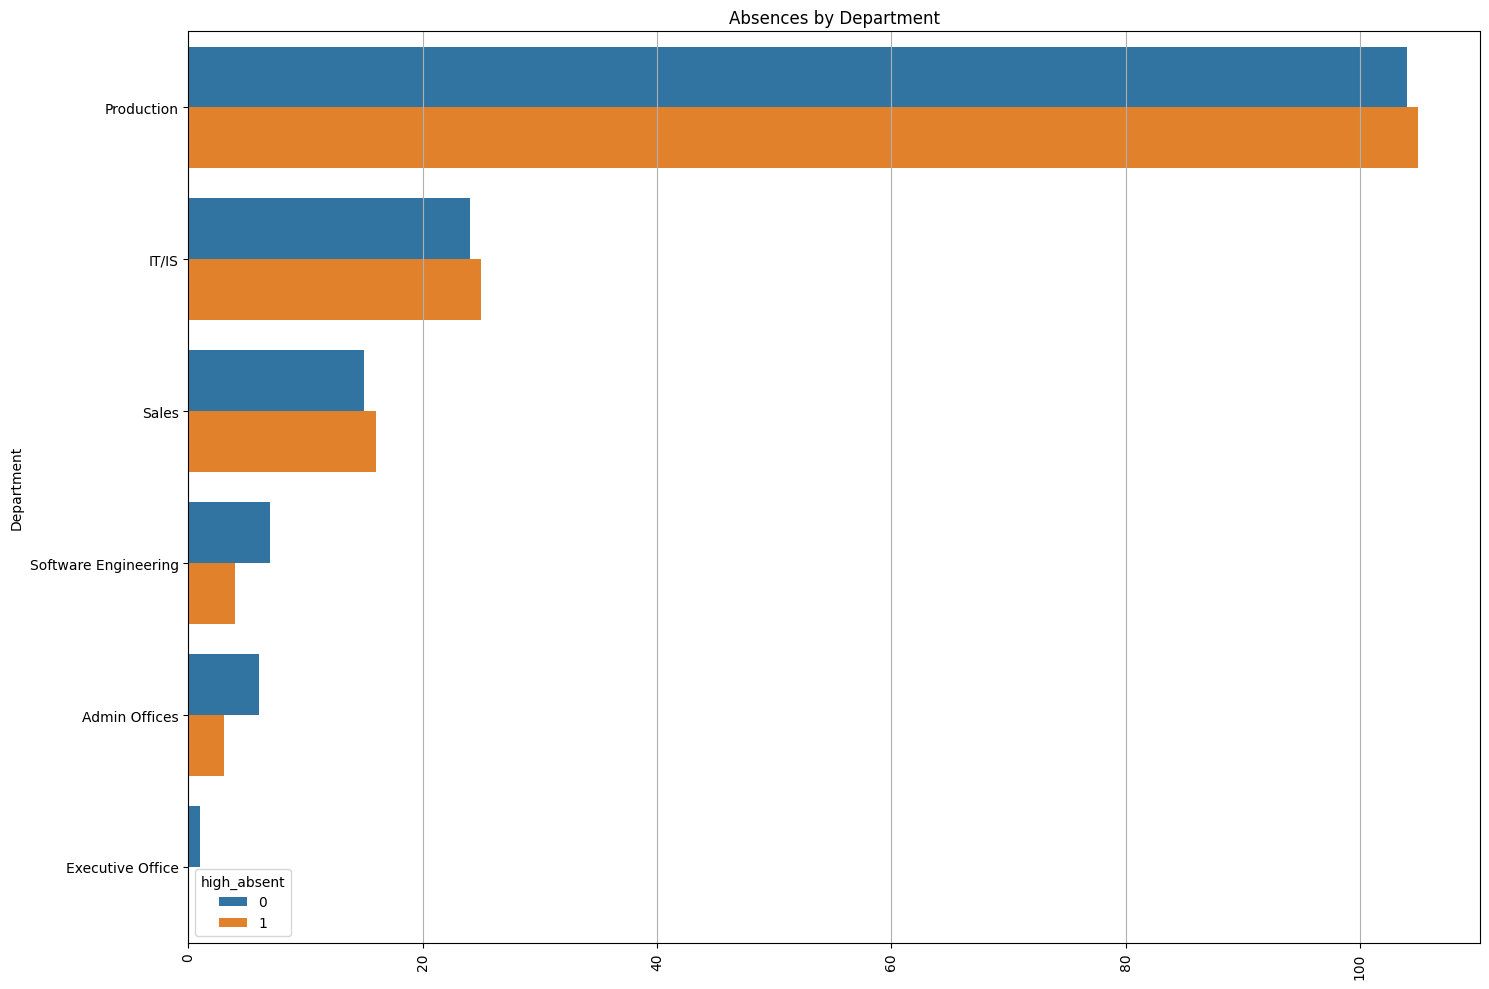

In [25]:
fig, ax = plt.subplots(1, figsize=(15,10), layout='tight')

sns.countplot(absent_df, y='Department', orient='h', order=absent_df['Department'].value_counts().index, hue='high_absent', ax=ax)
plt.title('Absences by Department')
plt.xlabel('')
plt.grid(axis='x')
plt.xticks(rotation=90)

plt.show()

- There doesn't seem to be any variation in high/low absences between departments.

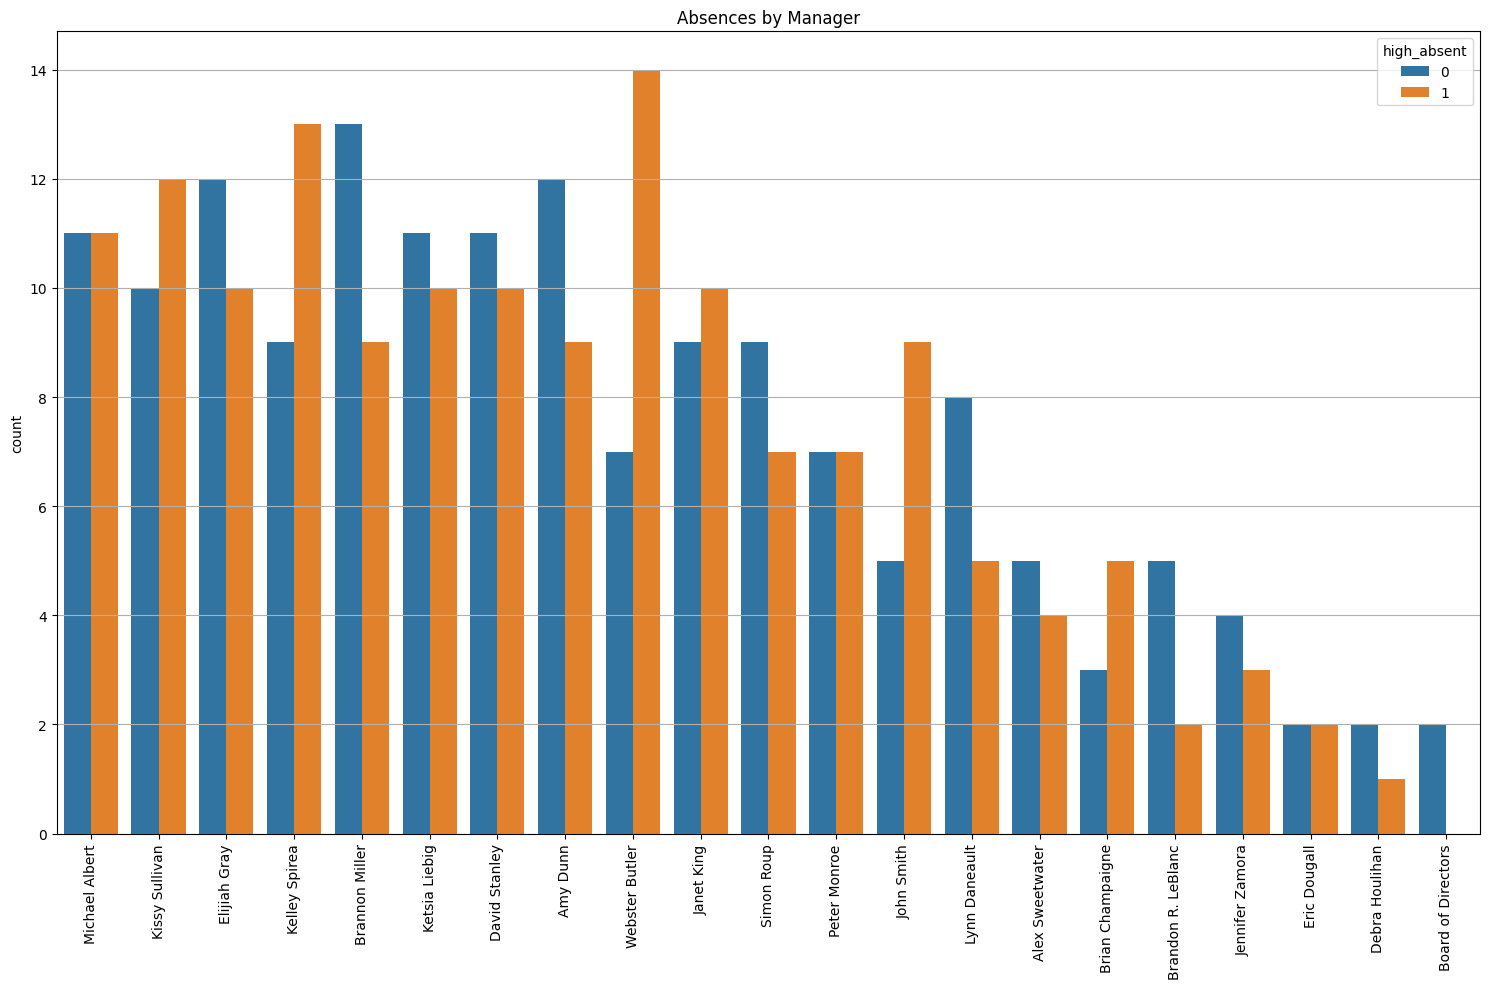

In [26]:
fig, ax = plt.subplots(1, figsize=(15,10), layout='tight')

sns.countplot(absent_df, x='ManagerName', orient='v', order=absent_df['ManagerName'].value_counts().index, hue='high_absent', ax=ax)
plt.title('Absences by Manager')
plt.xlabel('')
plt.grid(axis='y')
plt.xticks(rotation=90)

plt.show()

- For most managers, there doesn't seem to be a variation in high/low absences.

- However, Webster Butler, John Smith, and Kelley Spirea have an unusually high number of high absences.

__Looking at those who did voluntary termination__

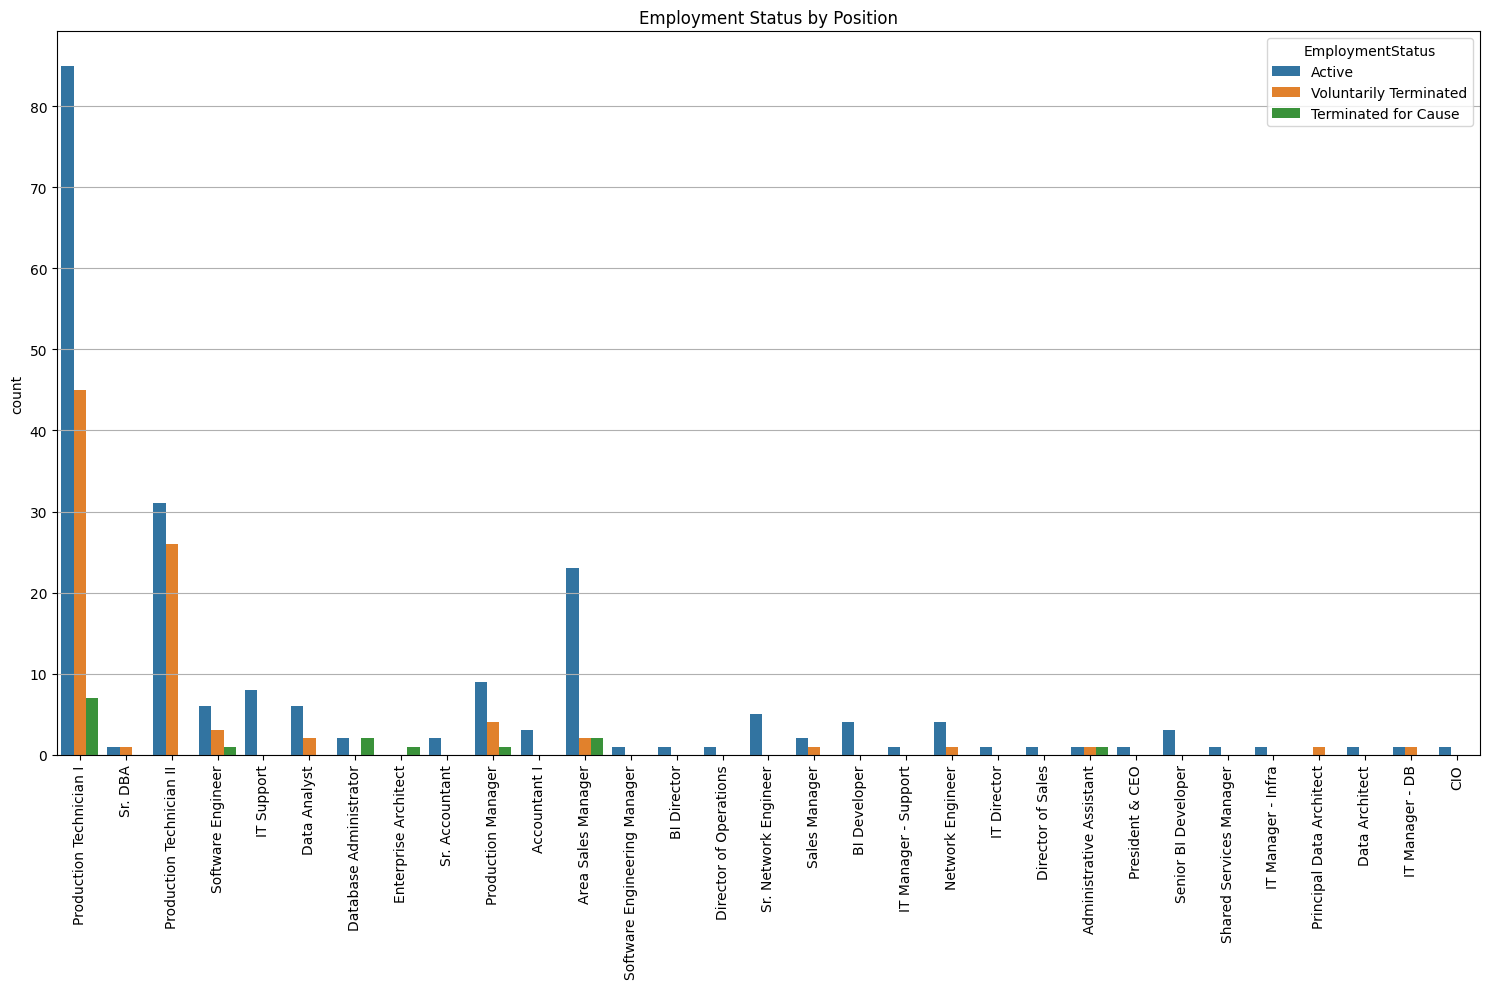

In [27]:
fig, ax = plt.subplots(1, figsize=(15,10), layout='tight')

sns.countplot(df, x='Position', orient='v', hue='EmploymentStatus', ax=ax)
plt.title('Employment Status by Position')
plt.xlabel('')
plt.grid(axis='y')
plt.xticks(rotation=90)

plt.show()

- Nothing interesting to note about Employment Status and Position.

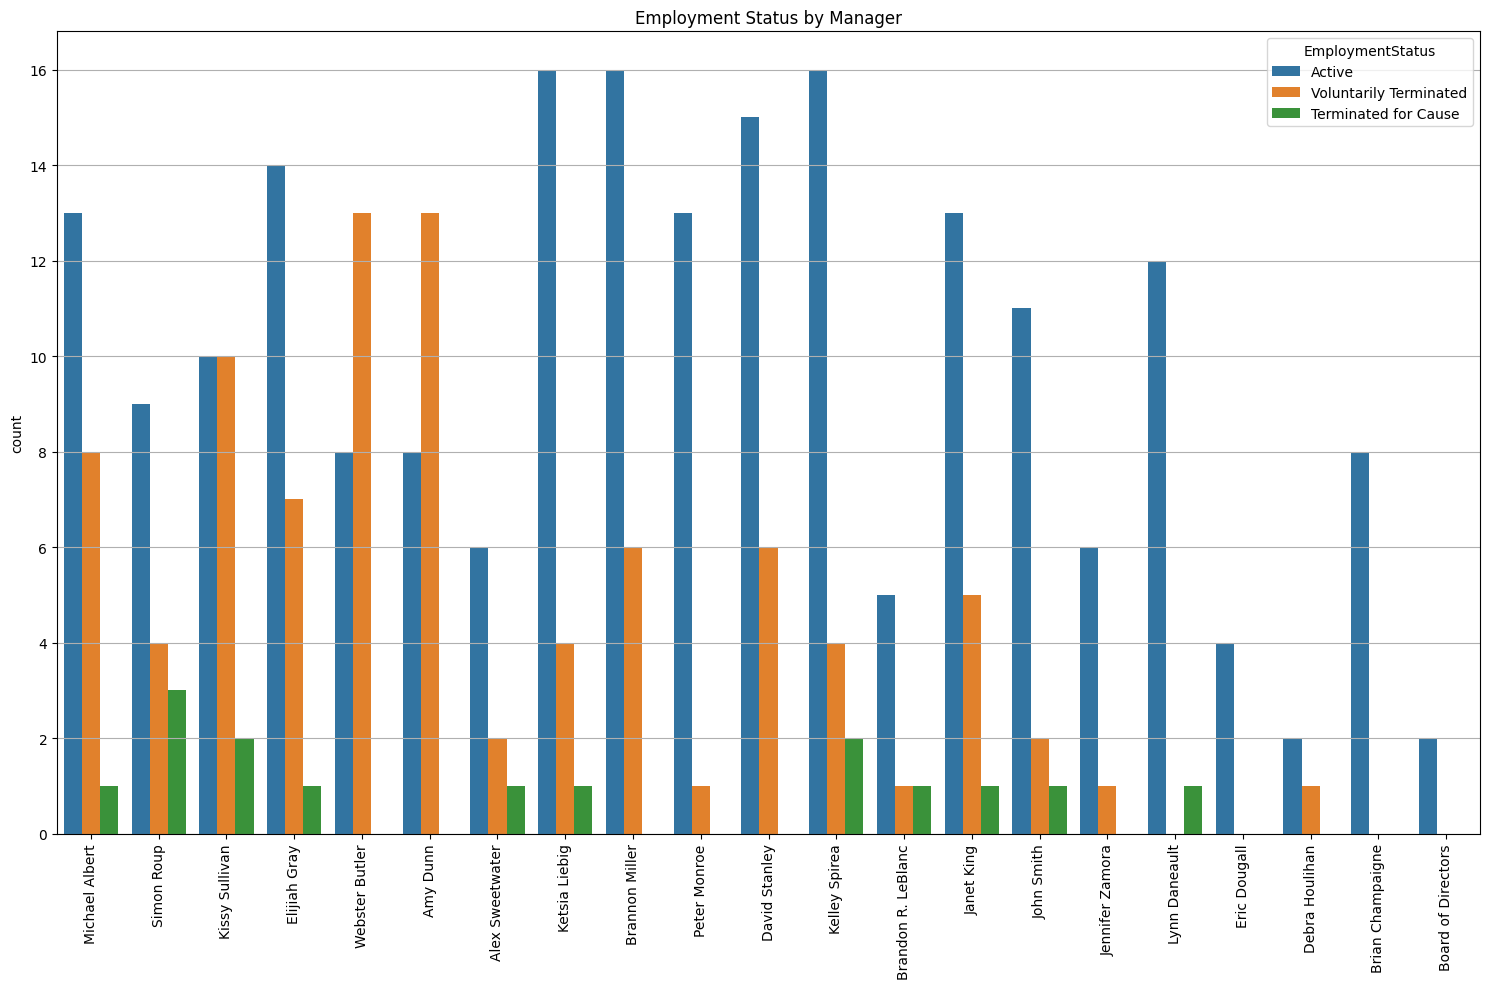

In [28]:
fig, ax = plt.subplots(1, figsize=(15,10), layout='tight')

sns.countplot(df, x='ManagerName', orient='v', hue='EmploymentStatus', ax=ax)
plt.title('Employment Status by Manager')
plt.xlabel('')
plt.grid(axis='y')
plt.xticks(rotation=90)

plt.show()

- Webster Butler, Kissy Sullivan, and Amy Dunn have a high number of people that voluntarily terminated.

In [29]:
vol_term = df.loc[df['EmploymentStatus'] == 'Voluntarily Terminated']
not_vol_term = df.loc[df['EmploymentStatus'] != 'Voluntarily Terminated']


vol_term.drop(columns=desc_cols_drop).describe()

,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,Days_As_Employee
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,63949.204545,4.180227,3.897727,0.511364,0.409091,10.954545,41.420455,1272.090909
std,17012.771985,0.710363,0.858223,1.568324,1.318623,5.795181,4.090138,733.523705
min,45115.000000,2.340000,2.000000,0.000000,0.000000,1.000000,33.000000,26.000000
25%,53414.000000,3.705000,3.000000,0.000000,0.000000,6.000000,39.750000,623.000000
50%,60512.000000,4.270000,4.000000,0.000000,0.000000,11.000000,41.000000,1200.500000
75%,68529.750000,4.770000,5.000000,0.000000,0.000000,16.000000,43.000000,1735.750000
max,148999.000000,5.000000,5.000000,7.000000,6.000000,20.000000,50.000000,3493.000000


In [30]:
not_vol_term.drop(columns=desc_cols_drop).describe()

,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,Days_As_Employee
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,70824.788288,4.079955,3.887387,1.486486,0.418919,9.954955,41.045045,3827.144144
std,27400.418085,0.820176,0.932531,2.543254,1.290481,5.877155,4.123407,985.363785
min,45046.000000,1.120000,1.000000,0.000000,0.000000,1.000000,32.000000,58.000000
25%,56883.000000,3.690000,3.000000,0.000000,0.000000,4.000000,38.000000,3471.000000
50%,63025.000000,4.280000,4.000000,0.000000,0.000000,9.500000,41.000000,3835.000000
75%,73245.500000,4.637500,5.000000,3.750000,0.000000,15.000000,44.000000,4479.000000
max,250000.000000,5.000000,5.000000,8.000000,6.000000,20.000000,50.000000,6796.000000


With the numeric information, the main things that stand out is that those who voluntarily terminated:
- Had lower Salaries
- Were assigned less Special Projects

The sample size of the voluntarily terminated sample is significantly smalled, so these numbers cannot be taken at face value. Nonetheless, this information still points at possible areas that account for someone quitting.

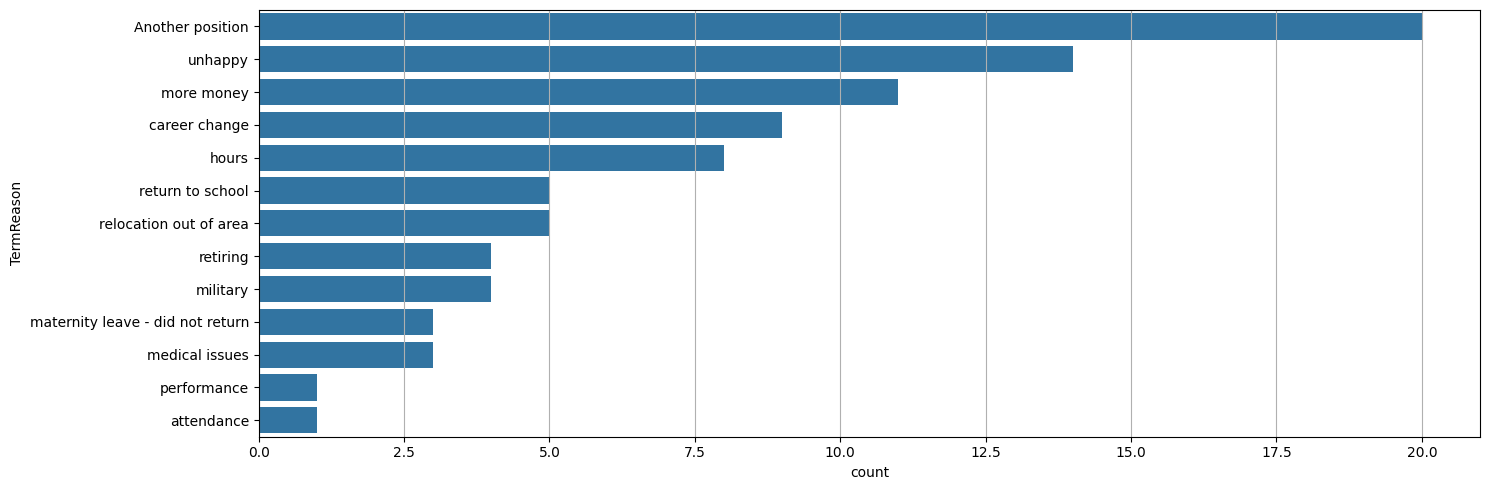

In [31]:
fig, axs = plt.subplots(1, figsize=(15,5), layout='tight')

sns.countplot(vol_term, y='TermReason', orient='h', order=vol_term['TermReason'].value_counts().index, ax=axs)
axs.grid(axis='x')

plt.show()

- About 50% of the people that voluntarily terminated did so because they found another position, were unhappy, or wanted more money. The other 50% resigned due to personal reasons unrelated to employee satisfaction.
- Something to consider is if some of the "Other Position" terminations were within the company.
- Something else to consider is why the "Unhappy" people felt this way. I will take a closer look at that demographic and see if there is any clear trend.

In [32]:
df.loc[df['TermReason'] == 'unhappy',]

,Employee_Name,FromDiversityJobFairID,Salary,Termd,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age,Days_As_Employee
11,"Barbara, Thomas",Yes,47211,Yes,Production Technician I,MA,2062,1974-02-21,M,Married,US Citizen,Yes,Black or African American,2012-04-02,2016-09-19,unhappy,Voluntarily Terminated,Production,Kissy Sullivan,Diversity Job Fair,Fully Meets,4.20,3,0,2016-05-06,0,15,50,1631
49,"Cloninger, Jennifer",No,64066,Yes,Production Technician II,MA,1752,1981-08-31,F,Married,US Citizen,No,White,2011-05-16,2013-01-07,unhappy,Voluntarily Terminated,Production,Brannon Miller,Google Search,Fully Meets,4.20,5,0,2012-05-03,0,9,43,602
65,"DeGweck, James",No,55722,Yes,Production Technician I,MA,1810,1977-10-31,M,Married,US Citizen,No,White,2011-05-16,2016-06-08,unhappy,Voluntarily Terminated,Production,Webster Butler,Indeed,Fully Meets,5.00,4,0,2016-04-02,0,14,47,1850
135,"Huynh, Ming",No,68182,Yes,Production Technician II,MA,1742,1976-09-22,F,Divorced,US Citizen,No,White,2011-02-21,2013-04-01,unhappy,Voluntarily Terminated,Production,Amy Dunn,Google Search,Fully Meets,3.72,3,0,2013-02-01,0,18,48,770
136,"Immediato, Walter",No,83082,Yes,Production Manager,MA,2128,1976-11-15,M,Married,US Citizen,No,Asian,2011-02-21,2012-09-24,unhappy,Voluntarily Terminated,Production,Janet King,Indeed,Needs Improvement,2.34,2,0,2012-04-12,3,4,48,581
145,"Jung, Judy",No,61154,Yes,Production Technician I,MA,2446,1986-04-17,F,Married,US Citizen,No,Black or African American,2011-01-10,2016-04-01,unhappy,Voluntarily Terminated,Production,Elijiah Gray,CareerBuilder,Fully Meets,4.00,4,0,2016-02-03,0,4,38,1908
167,"Linares, Marilyn",No,52624,Yes,Production Technician I,MA,1886,1981-03-26,F,Married,US Citizen,No,White,2011-07-05,2018-09-26,unhappy,Voluntarily Terminated,Production,Michael Albert,Indeed,Fully Meets,3.18,4,0,2018-03-02,0,16,43,2640
187,"Miller, Ned",No,55800,Yes,Production Technician II,MA,2472,1985-06-29,M,Single,US Citizen,No,White,2011-08-15,2014-09-04,unhappy,Voluntarily Terminated,Production,Brannon Miller,LinkedIn,PIP,3.00,2,0,2013-01-14,6,6,39,1116
205,"Oliver, Brooke",No,71966,Yes,Production Technician II,MA,2492,1983-04-26,F,Married,US Citizen,No,Asian,2012-05-14,2013-08-19,unhappy,Voluntarily Terminated,Production,Webster Butler,LinkedIn,Fully Meets,5.00,3,0,2013-07-02,0,17,41,462
214,"Pelletier, Ermine",No,60270,Yes,Production Technician II,MA,2472,1989-07-18,F,Married,US Citizen,No,Asian,2011-07-05,2015-09-15,unhappy,Voluntarily Terminated,Production,Amy Dunn,CareerBuilder,Needs Improvement,2.40,5,0,2015-02-06,5,2,35,1533


The main two things I notice about those who left because they were unhappy are:
- Most tend to be female
- All work in Production

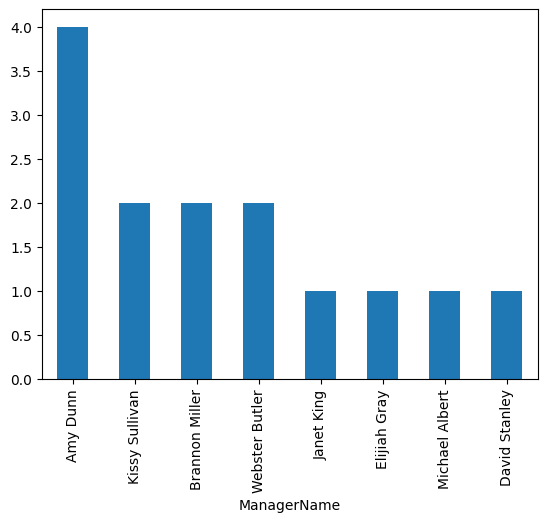

In [33]:
df.loc[df['TermReason'] == 'unhappy', 'ManagerName'].value_counts().plot(kind='bar')
plt.show()

- It would definitely be worth looking into Amy Dunn. They had a high number of voluntarily terminated and here it shows that she had the highest number of people who left due to being unhappy.
- Kissy Sullivan and Webster Butler are also appearing here again.

__Now I want to look into how number of special projects demographics and how it might impact employee satisfaction, engagement, and termination__

In [47]:
special_project_df = df.loc[df['SpecialProjectsCount'] > 0]
no_special_project_df = df.loc[df['SpecialProjectsCount'] == 0]

In [51]:
special_project_df.drop(columns=desc_cols_drop).describe()

,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,Days_As_Employee
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,92377.478261,4.141594,3.898551,5.434783,0.275362,9.913043,40.028986,3126.101449
std,30961.264997,0.805004,0.909831,1.322634,1.055574,5.972336,3.138804,1395.653707
min,49920.000000,1.200000,2.000000,1.000000,0.000000,1.000000,35.000000,58.000000
25%,70621.000000,3.750000,3.000000,5.000000,0.000000,4.000000,37.000000,2741.000000
50%,92328.000000,4.300000,4.000000,6.000000,0.000000,9.000000,41.000000,3471.000000
75%,103613.000000,4.700000,5.000000,6.000000,0.000000,15.000000,41.000000,3877.000000
max,220450.000000,5.000000,5.000000,8.000000,6.000000,20.000000,49.000000,5774.000000


In [50]:
no_special_project_df.drop(columns=desc_cols_drop).describe()

,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,Days_As_Employee
count,241.000000,241.000000,241.000000,241.0,241.000000,241.000000,241.000000,241.000000
mean,62143.514523,4.098921,3.887967,0.0,0.456432,10.331950,41.473029,3094.892116
std,18241.948289,0.788024,0.912814,0.0,1.356762,5.839322,4.301199,1500.405730
min,45046.000000,1.120000,1.000000,0.0,0.000000,1.000000,32.000000,26.000000
25%,54005.000000,3.660000,3.000000,0.0,0.000000,5.000000,39.000000,1675.000000
50%,60656.000000,4.200000,4.000000,0.0,0.000000,11.000000,41.000000,3611.000000
75%,64995.000000,4.700000,5.000000,0.0,0.000000,15.000000,44.000000,4115.000000
max,250000.000000,5.000000,5.000000,0.0,6.000000,20.000000,50.000000,6796.000000


- Excluding Salary, there doesn't appear to be any significant differences in the mean values of the numeric variables.

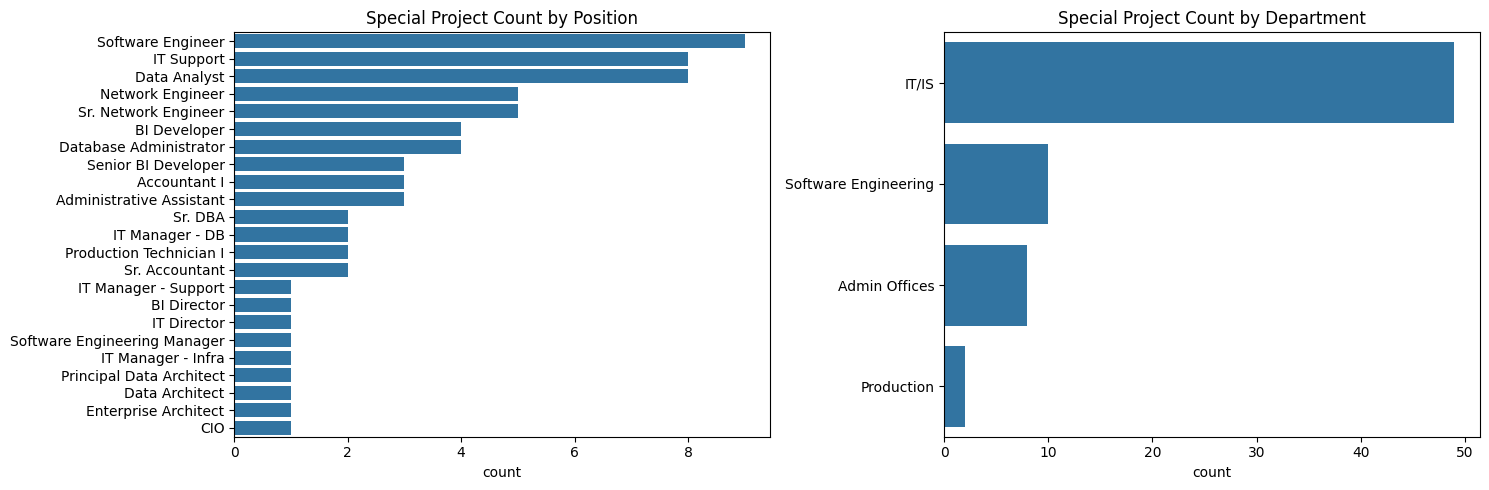

In [35]:
spec_proj_cols = ['Position','Department']
fig, axs = plt.subplots(1,2, figsize=(15,5), layout='tight')

for ax, title in zip(axs.flat, spec_proj_cols):
    order=special_project_df[title].value_counts().index
    sns.countplot(special_project_df, y=title, order=order, orient='h', ax=ax)
    ax.set_title(f'Special Project Count by {title}')
    ax.set_ylabel('')

plt.show()

- Looks like most special projects are within the IT/IS department.
- No special projects from the Sales Department.

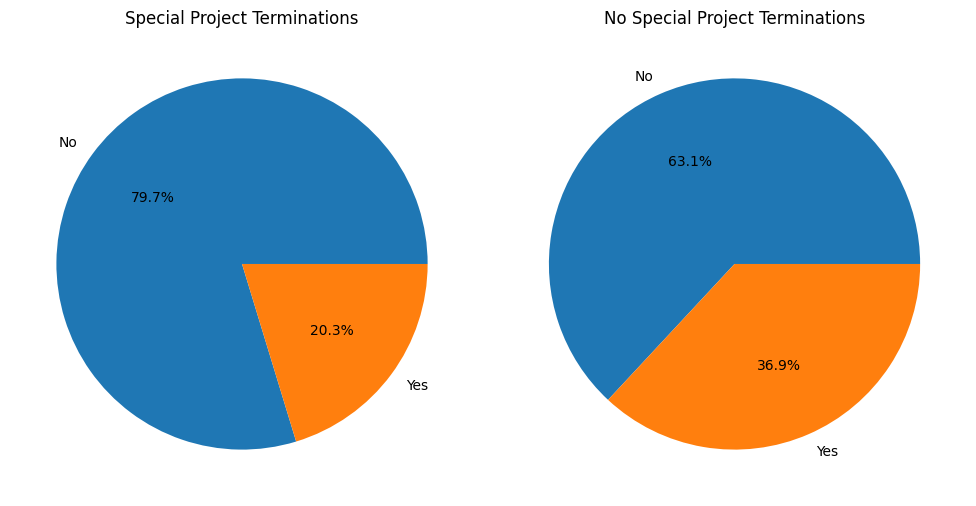

In [36]:
fig, axs = plt.subplots(1,2,figsize=(10,5), layout='tight')

label = special_project_df['Termd'].value_counts().index
axs[0].pie(special_project_df['Termd'].value_counts(), labels=label, autopct='%1.1f%%')
axs[0].set_title('Special Project Terminations')

label = no_special_project_df['Termd'].value_counts().index
axs[1].pie(no_special_project_df['Termd'].value_counts(), labels=label, autopct='%1.1f%%')
axs[1].set_title('No Special Project Terminations')

plt.show()

- There is a significant difference in termination rates between those with special projects and those without.

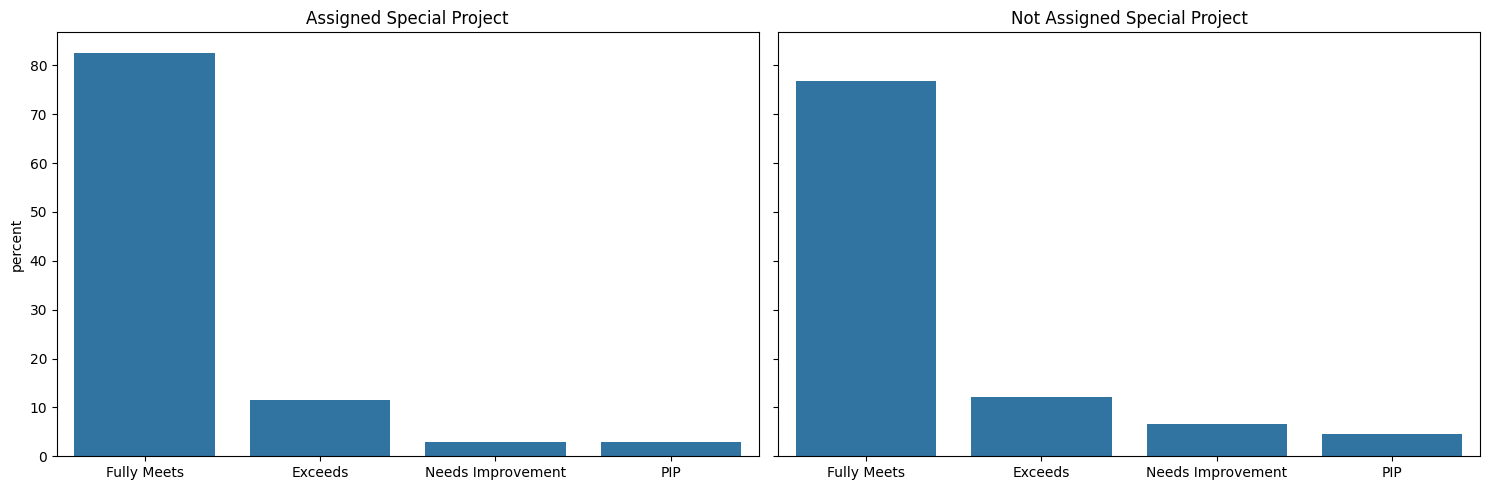

In [41]:
fig, axs = plt.subplots(1,2, figsize=(15,5), layout='tight', sharey=True, sharex=True)

sns.countplot(special_project_df, x='PerformanceScore', stat='percent', ax=axs[0])
axs[0].set_title('Assigned Special Project')
axs[0].set_xlabel('')
sns.countplot(no_special_project_df, x='PerformanceScore', stat='percent', ax=axs[1])
axs[1].set_title('Not Assigned Special Project')
axs[1].set_xlabel('')

plt.show()

- Those who are assigned special projects tend to have better performance scores.